In [1]:
import random
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import geopandas
import pyproj
import rasterio
import rasterstats
import pandas as pd
import json
from rasterio.mask import mask
from rasterio.plot import show
import matplotlib.colors as pltc
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterstats import zonal_stats
import dask.dataframe as dd
import geopandas as gpd

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

__Conclusion #1__

In [2]:
#reading in the FBFM lease type data 

lease_type = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/FBFM Data with County.csv")

In [3]:
#viewing all columns

lease_type.head()

,year,county1,county,fbfmcode,debt_to_asset,Cash_acres,Share_acres,Owned_Acres,Total_Acres,spr,Cash_percent,Share_percent,Owned_percent
0,2020,Adams,ADAMS,1,0.315154181,1461,508,956,2925,80.720684,0.499487,0.173675,0.326838
1,2020,Bond,BOND,3,0.121848408,339,454,419,1212,55.535479,0.279703,0.374587,0.345710
2,2020,Boone,BOONE,4,0.149520952,137,364,0,501,88.000000,0.273453,0.726547,0.000000
3,2020,Brown,BROWN,5,0.221457013,420,704,972,2096,78.000000,0.200382,0.335878,0.463740
4,2020,Bureau,BUREAU,6,0.33099995,12161,2906,4597,19664,87.419955,0.618440,0.147783,0.233777


Text(0.5, 1.0, 'Number of Acres by Lease Type from 2003 to 2020')

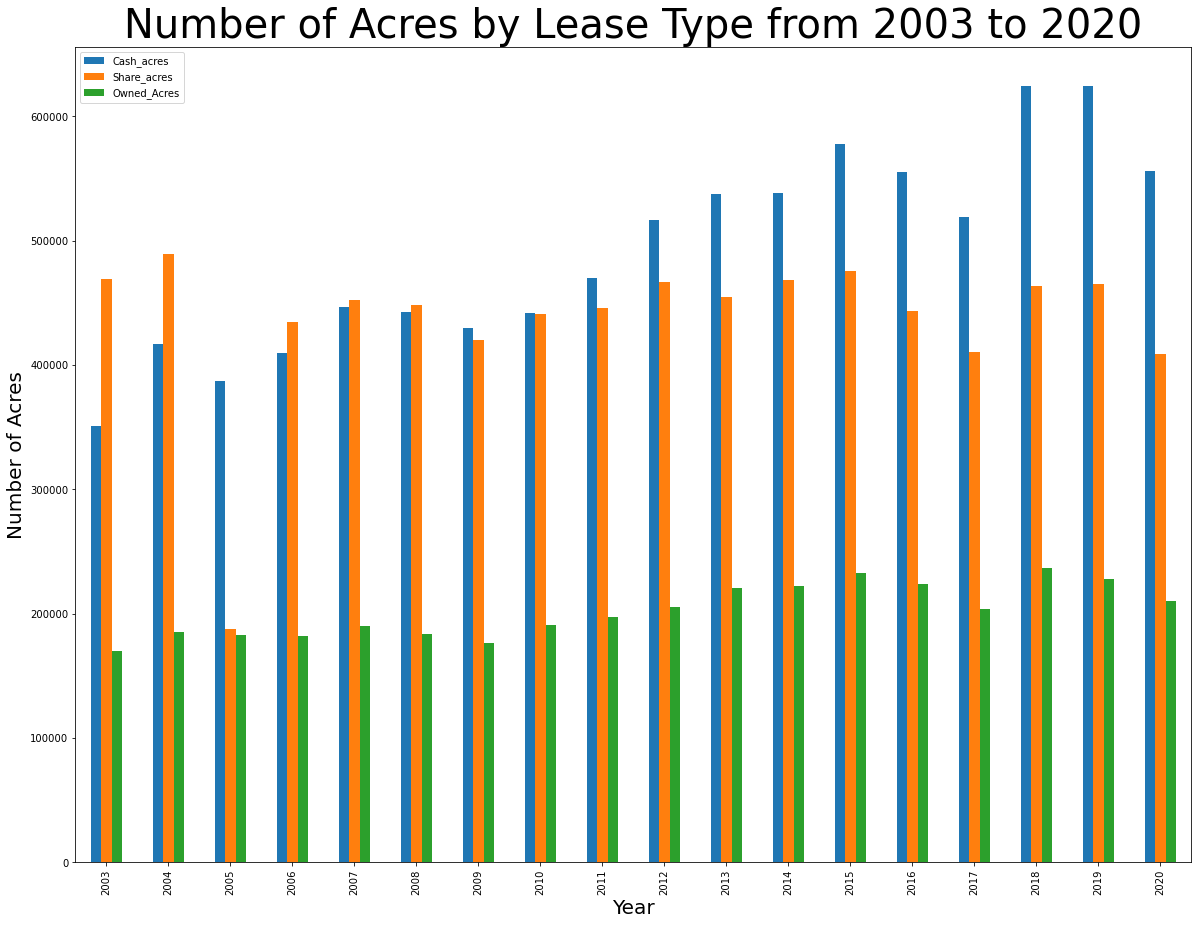

In [4]:
#plotting to show changes in lease types over time

lease_type.groupby('year', as_index=False).sum().plot(x="year", y=["Cash_acres", "Share_acres", "Owned_Acres"], kind="bar", figsize=(20,15))
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number of Acres", fontsize=20)
plt.title("Number of Acres by Lease Type from 2003 to 2020", fontsize=40)

__Conclusion #2__

In [5]:
#creating our first directory - FBFM lease type data for 2003 through 2020

d01 = "/Users/cft3/Desktop/ACE 592 Final Presentation/d01"

In [6]:
#creating a second directory - Illinois shapefile 

d02 = "/Users/cft3/Desktop/ACE 592 Final Presentation/d02"

In [7]:
#reading in the Illinois shapefile using geopandas

counties = geopandas.read_file("/Users/cft3/Desktop/ACE 592 Final Presentation/d02/IL_BNDY_County_Py.shp")

<AxesSubplot:>

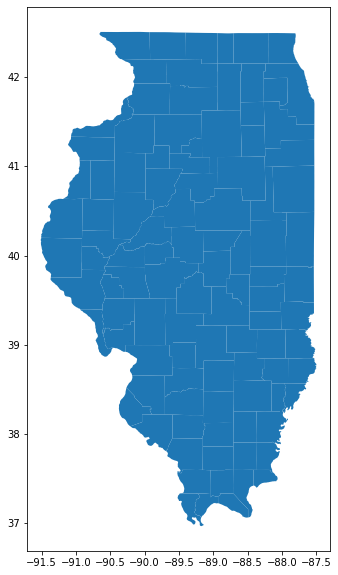

In [8]:
counties.plot(figsize=(20, 10))

In [11]:
#renaming column to make sure the csv and shape file match 

counties = counties.rename({'COUNTY_NAM': 'county'}, axis = 'columns')

In [15]:
#reading in data from year 2003 to 2020

lease_type03 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM03.csv")
lease_type04 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM04.csv")
lease_type05 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM05.csv")
lease_type06 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM06.csv")
lease_type07 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM07.csv")
lease_type08 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM08.csv")
lease_type09 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM09.csv")
lease_type10 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM10.csv")
lease_type11 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM11.csv")
lease_type12 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM12.csv")
lease_type13 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM13.csv")
lease_type14 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM14.csv")
lease_type15 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM15.csv")
lease_type16 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM16.csv")
lease_type17 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM17.csv")
lease_type18 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM18.csv")
lease_type19 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM19.csv")
lease_type20 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d01/FBFM20.csv")

In [18]:
#merged csv and shape files for each respecitve year from 2003 to 2020

counties_merge03 = counties.merge(lease_type03,
 left_on=['county'], 
 right_on=['county'])

counties_merge04 = counties.merge(lease_type04,
 left_on=['county'], 
 right_on=['county'])

counties_merge05 = counties.merge(lease_type05,
 left_on=['county'], 
 right_on=['county'])

counties_merge06 = counties.merge(lease_type06,
 left_on=['county'], 
 right_on=['county'])

counties_merge07 = counties.merge(lease_type07,
 left_on=['county'], 
 right_on=['county'])

counties_merge08 = counties.merge(lease_type08,
 left_on=['county'], 
 right_on=['county'])

counties_merge09 = counties.merge(lease_type09,
 left_on=['county'], 
 right_on=['county'])

counties_merge10 = counties.merge(lease_type10,
 left_on=['county'], 
 right_on=['county'])

counties_merge11 = counties.merge(lease_type11,
 left_on=['county'], 
 right_on=['county'])

counties_merge12 = counties.merge(lease_type12,
 left_on=['county'], 
 right_on=['county'])

counties_merge13 = counties.merge(lease_type13,
 left_on=['county'], 
 right_on=['county'])

counties_merge14 = counties.merge(lease_type14,
 left_on=['county'], 
 right_on=['county'])

counties_merge15 = counties.merge(lease_type15,
 left_on=['county'], 
 right_on=['county'])

counties_merge16 = counties.merge(lease_type16,
 left_on=['county'], 
 right_on=['county'])

counties_merge17 = counties.merge(lease_type17,
 left_on=['county'], 
 right_on=['county'])

counties_merge18 = counties.merge(lease_type18,
 left_on=['county'], 
 right_on=['county'])

counties_merge19 = counties.merge(lease_type19,
 left_on=['county'], 
 right_on=['county'])

counties_merge20 = counties.merge(lease_type20,
 left_on=['county'], 
 right_on=['county'])

In [19]:
lease_type03.head()

,year,county1,county,fbfmcode,debt_to_asset,Cash_acres,Share_acres,Owned_Acres,Total_Acres,spr,Cash_percent,Share_percent,Owned_percent
0,2003,Adams,ADAMS,1,0.238237,6263,7579,3947,17789,82.597617,0.352072,0.426050,0.221879
1,2003,Boone,BOONE,4,0.298554,584,0,113,697,74.000000,0.837877,0.000000,0.162123
2,2003,Brown,BROWN,5,0.185274,2464,885,1058,4407,77.197867,0.559111,0.200817,0.240073
3,2003,Bureau,BUREAU,6,0.438236,19083,7955,8067,35105,80.062783,0.543598,0.226606,0.229796
4,2003,Carroll,CARROLL,8,0.531744,7053,1027,2831,10911,72.727889,0.646412,0.094125,0.259463


Text(0.5, 1.0, 'Percent of Cash Rentals - 2003')

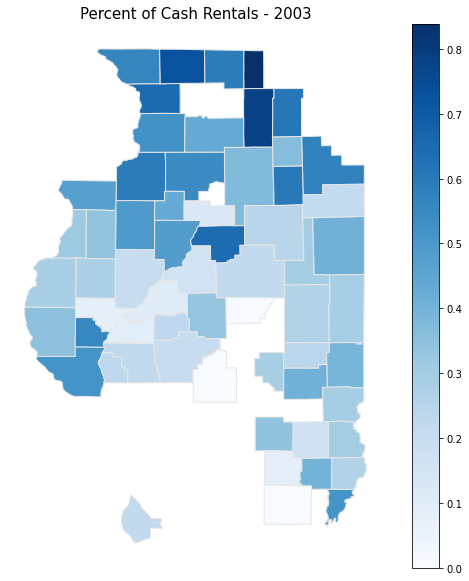

In [20]:
#plotting data for 2003

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge03.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2003", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2004')

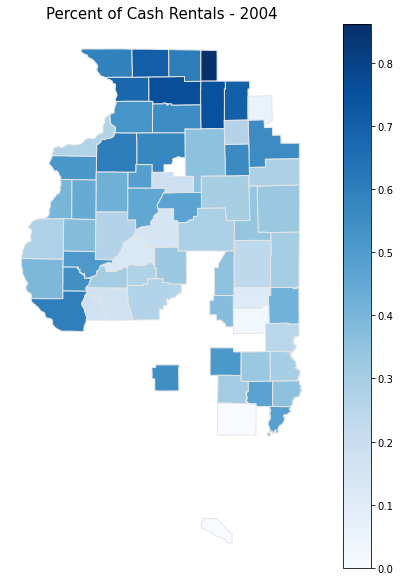

In [21]:
#plotting data for 2004

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge04.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2004", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2005')

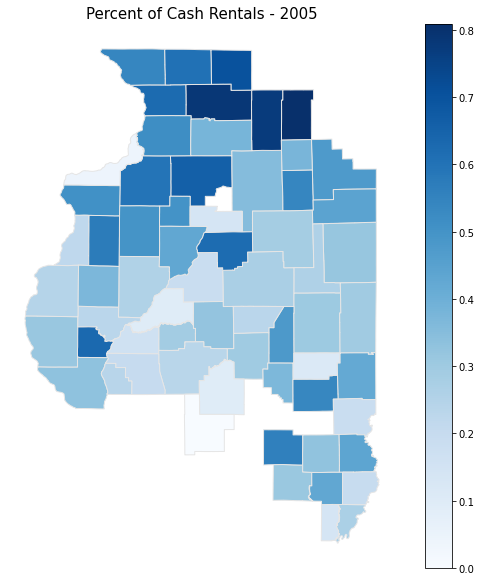

In [22]:
#plotting data for 2005

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge05.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2005", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2006')

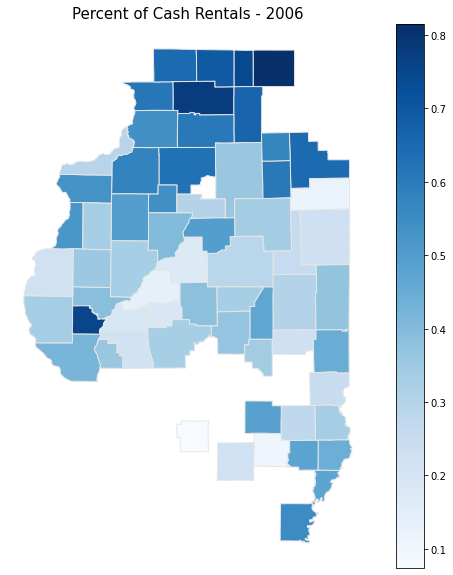

In [23]:
#plotting data for 2006

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge06.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2006", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2007')

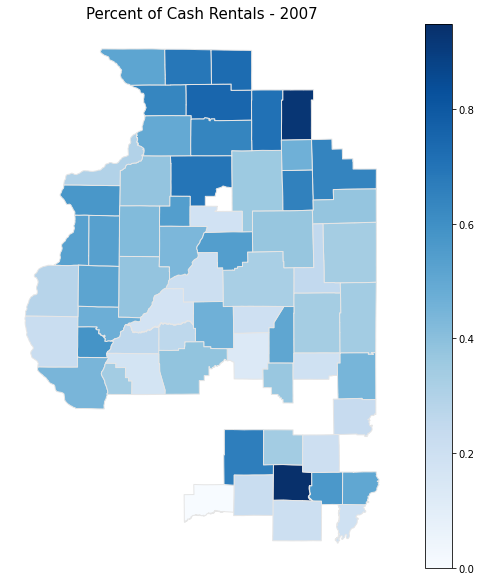

In [24]:
#plotting data for 2007

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge07.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2007", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2008')

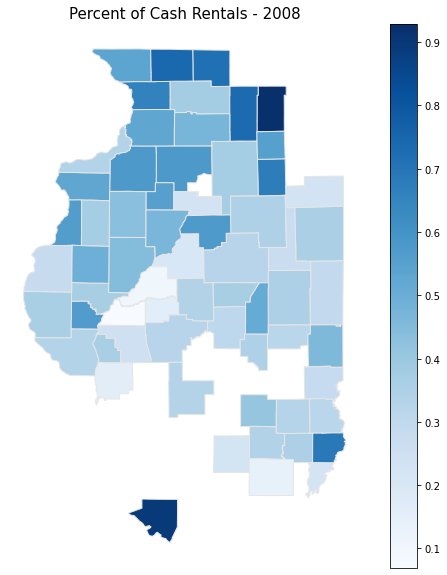

In [25]:
#plotting data for 2008

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge08.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2008", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2009')

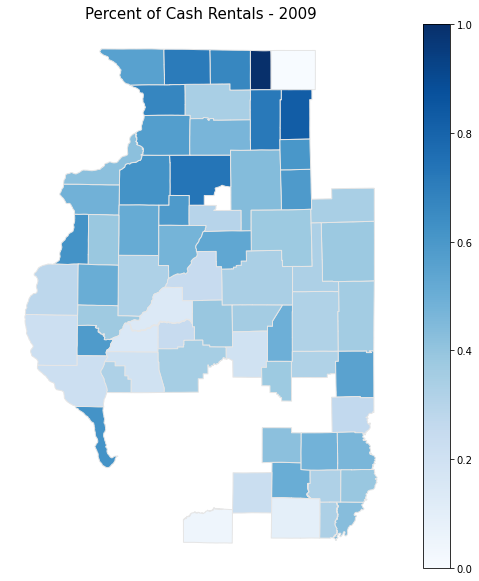

In [26]:
#plotting data for 2009

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge09.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2009", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2010')

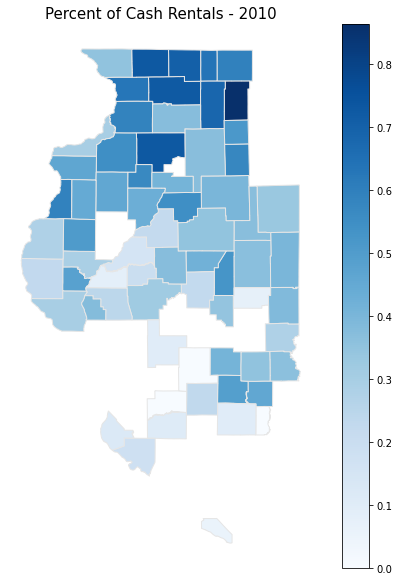

In [27]:
#plotting data for 2010

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge10.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2010", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2011')

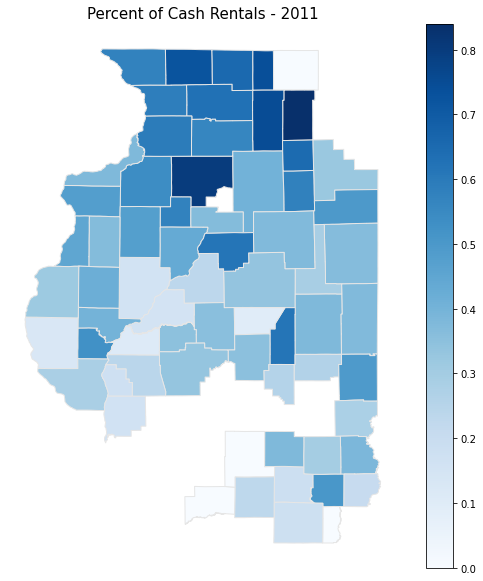

In [28]:
#plotting data for 2011

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge11.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2011", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2012')

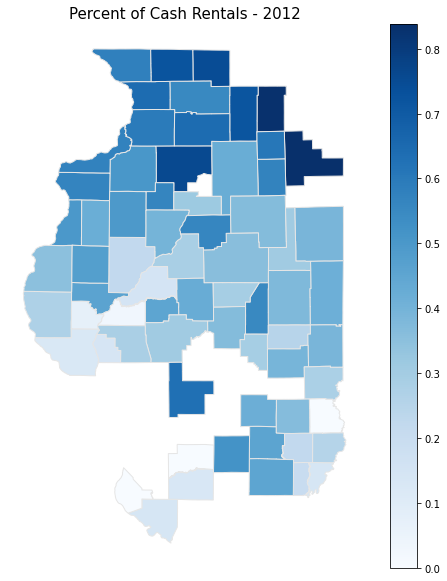

In [29]:
#plotting data for 2012

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge12.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2012", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2013')

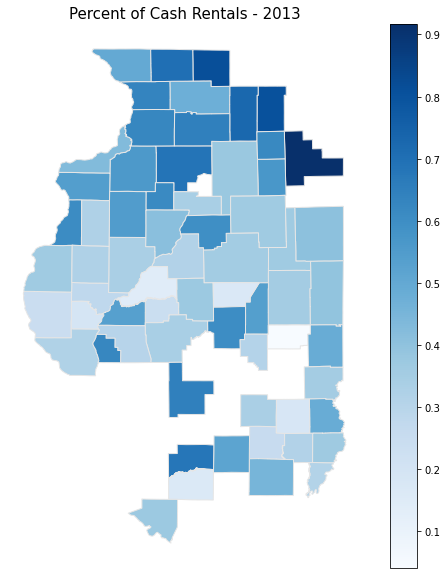

In [30]:
#plotting data for 2013

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge13.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2013", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2014')

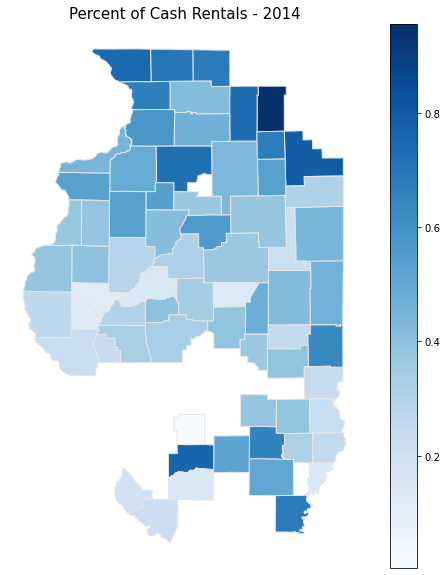

In [31]:
#plotting data for 2014

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge14.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2014", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2015')

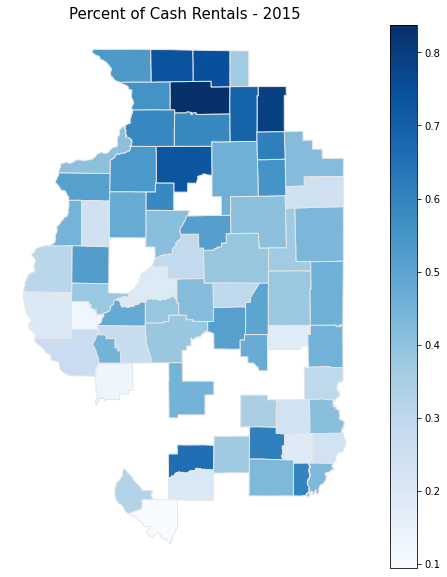

In [32]:
#plotting data for 2015

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge15.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2015", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2016')

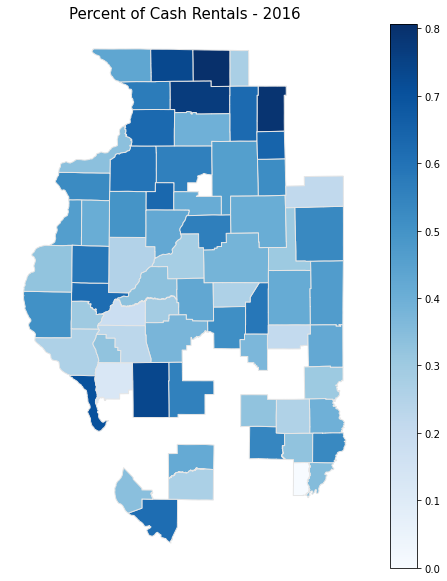

In [33]:
#plotting data for 2016

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge16.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2016", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2017')

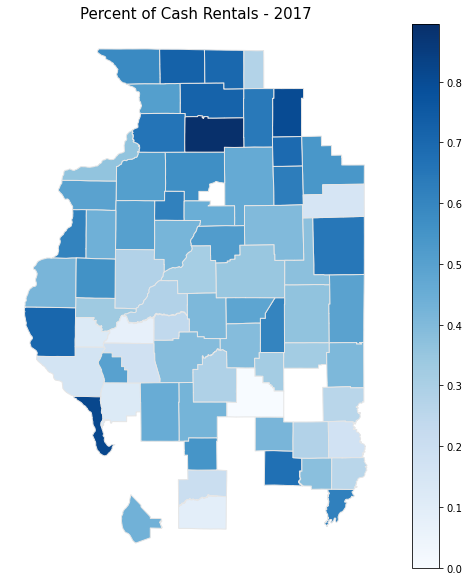

In [34]:
#plotting data for 2017

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge17.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2017", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2018')

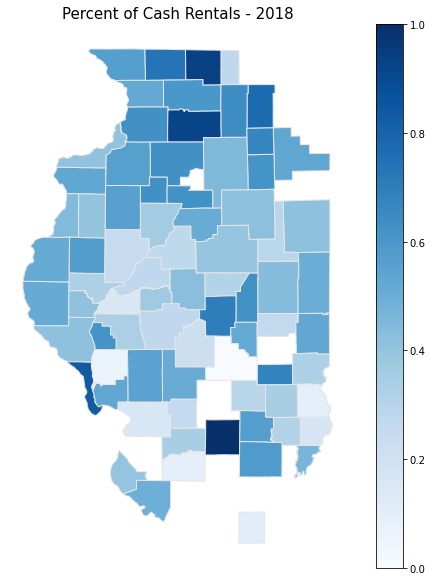

In [35]:
#plotting data for 2018

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge18.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2018", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2019')

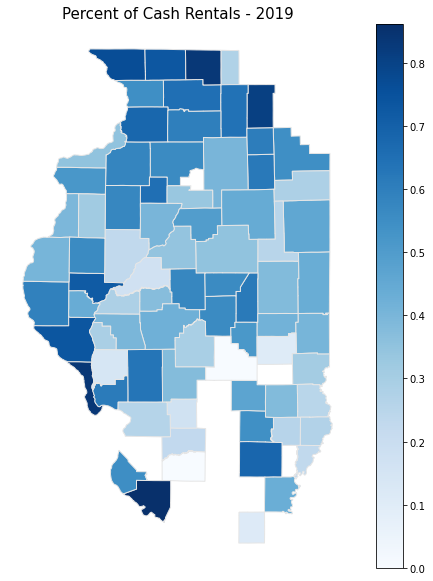

In [36]:
#plotting data for 2019

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge19.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2019", fontsize=15)

Text(0.5, 1.0, 'Percent of Cash Rentals - 2020')

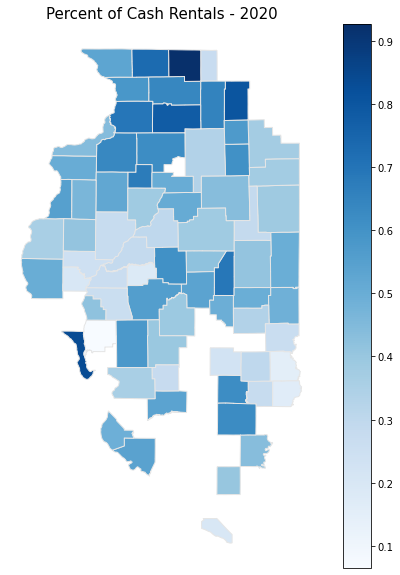

In [39]:
#plotting data for 2020

fig, ax = plt.subplots(1, figsize=(10,10))
counties_merge20.plot(column='Cash_percent', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Percent of Cash Rentals - 2020", fontsize=15)

__Conclusion #3__

In [67]:
#reading in insurance data from 2003 - 2020

insurance = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/combined_csv.csv")

/Users/cft3/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,6,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:
insurance.head()

,Year,State Code,State Abrev,County Code,county,Com Code,Com Name,Insur Code,Insur Abrev,Coverage Level,Policy Sold Count,Unit,Net Reported Quantity
0,2003.0,17.0,IL,1.0,ADAMS,9999.0,All Other Crops,90.0,APH,0.70,1.0,Acres,77.0
1,2003.0,17.0,IL,1.0,ADAMS,41.0,CORN,90.0,APH,0.50,12.0,Acres,1287.0
2,2003.0,17.0,IL,1.0,ADAMS,41.0,CORN,90.0,APH,0.55,2.0,Acres,529.0
3,2003.0,17.0,IL,1.0,ADAMS,41.0,CORN,90.0,APH,0.60,2.0,Acres,216.0
4,2003.0,17.0,IL,1.0,ADAMS,41.0,CORN,90.0,APH,0.65,127.0,Acres,6883.0


Text(0.5, 1.0, 'Total Acres Insured from 2003 to 2020')

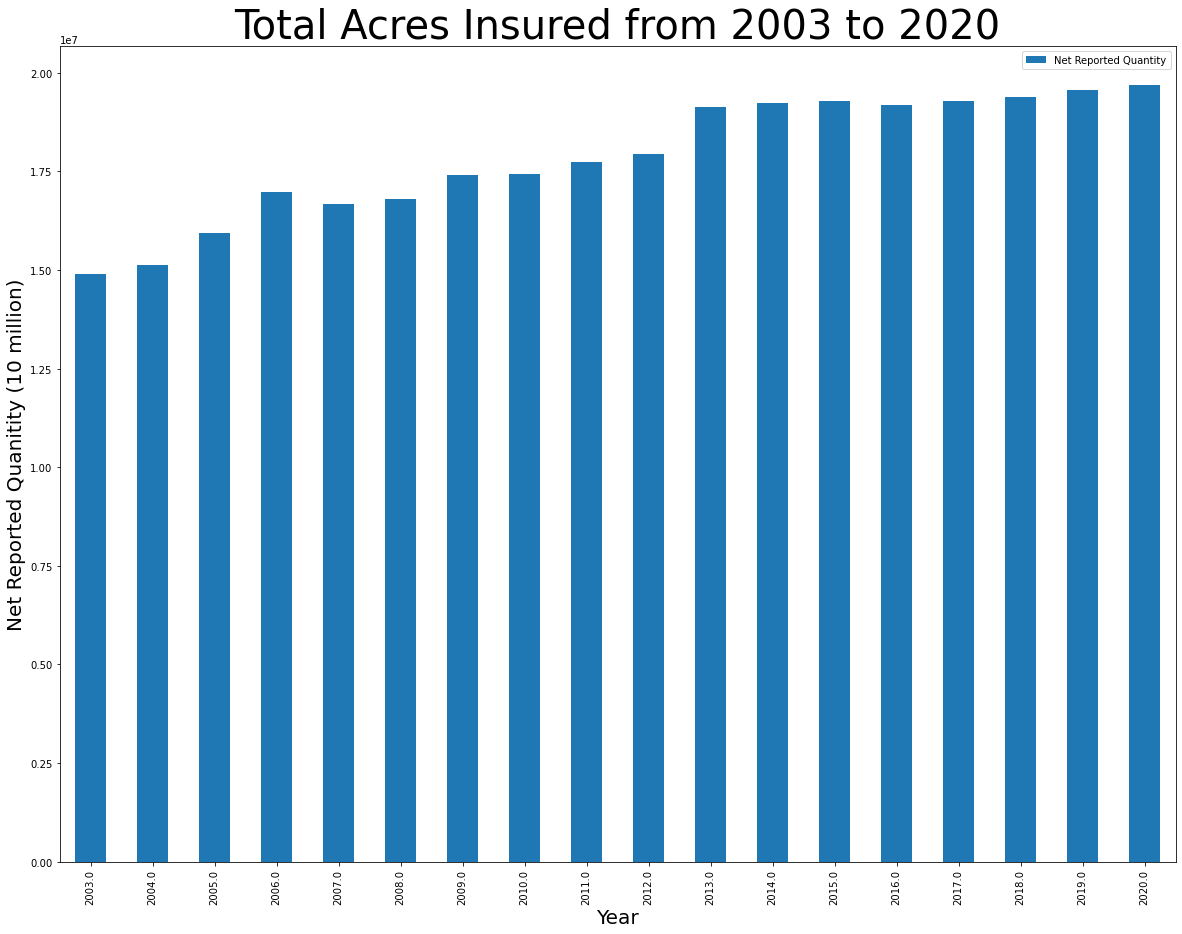

In [69]:
#showing total acres insured overtime

insurance.groupby('Year', as_index=False).sum().plot(x="Year", y="Net Reported Quantity", kind="bar", figsize=(20,15))
plt.xlabel("Year", fontsize=20)
plt.ylabel("Net Reported Quanitity (10 million)", fontsize=20)
plt.title("Total Acres Insured from 2003 to 2020", fontsize=40)

__Conclusion #4__

Text(0.5, 1.0, 'Average Coverage Level from 2003 to 2020')

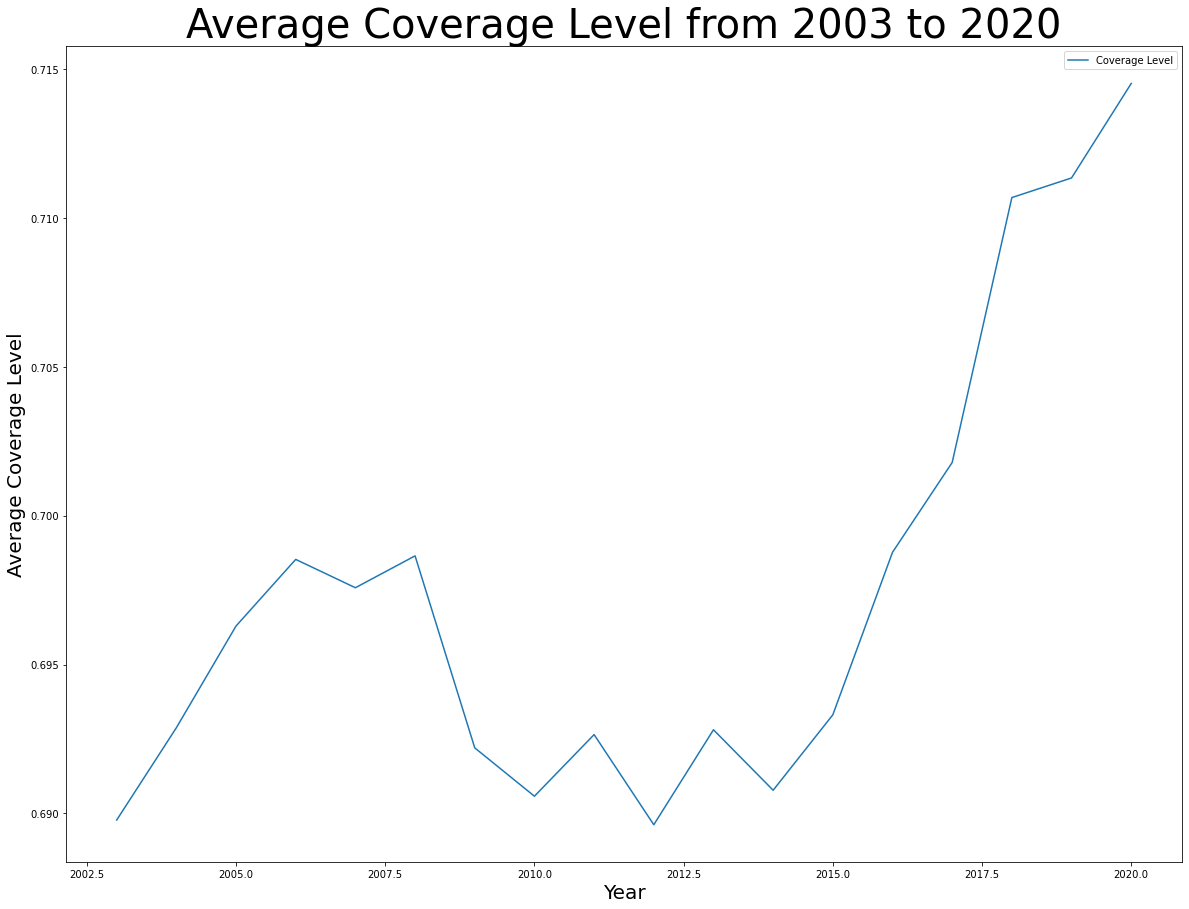

In [70]:
#graph of average coverage levels overtime

insurance.groupby('Year', as_index=False).mean().plot(x="Year", y="Coverage Level", kind="line", figsize=(20,15))
plt.xlabel("Year", fontsize=20)
plt.ylabel("Average Coverage Level", fontsize=20)
plt.title("Average Coverage Level from 2003 to 2020", fontsize=40)

__Conclusion #5__

In [71]:
#creating our third directory - insurance data by year 

d03 = "/Users/cft3/Desktop/ACE 592 Final Presentation/d03"

In [72]:
#reading in data for 2003 to 2020 to create a map of acres insured, summing by county and stripping the data

insurance03 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance03.csv")
insurance_totals03 = insurance03.groupby(["county"], as_index=False).sum()
insurance_totals03.county = insurance_totals03.county.str.strip()

insurance04 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance04.csv")
insurance_totals04 = insurance04.groupby(["county"], as_index=False).sum()
insurance_totals04.county = insurance_totals04.county.str.strip()

insurance05 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance05.csv")
insurance_totals05 = insurance05.groupby(["county"], as_index=False).sum()
insurance_totals05.county = insurance_totals05.county.str.strip()

insurance06 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance06.csv")
insurance_totals06 = insurance06.groupby(["county"], as_index=False).sum()
insurance_totals06.county = insurance_totals06.county.str.strip()

insurance07 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance07.csv")
insurance_totals07 = insurance07.groupby(["county"], as_index=False).sum()
insurance_totals07.county = insurance_totals07.county.str.strip()

insurance08 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance08.csv")
insurance_totals08 = insurance08.groupby(["county"], as_index=False).sum()
insurance_totals08.county = insurance_totals08.county.str.strip()

insurance09 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance09.csv")
insurance_totals09 = insurance09.groupby(["county"], as_index=False).sum()
insurance_totals09.county = insurance_totals09.county.str.strip()

insurance10 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance10.csv")
insurance_totals10 = insurance10.groupby(["county"], as_index=False).sum()
insurance_totals10.county = insurance_totals10.county.str.strip()

insurance11 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance11.csv")
insurance_totals11 = insurance11.groupby(["county"], as_index=False).sum()
insurance_totals11.county = insurance_totals11.county.str.strip()

insurance12 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance12.csv")
insurance_totals12 = insurance12.groupby(["county"], as_index=False).sum()
insurance_totals12.county = insurance_totals12.county.str.strip()

insurance13 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance13.csv")
insurance_totals13 = insurance13.groupby(["county"], as_index=False).sum()
insurance_totals13.county = insurance_totals13.county.str.strip()

insurance14 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance14.csv")
insurance_totals14 = insurance14.groupby(["county"], as_index=False).sum()
insurance_totals14.county = insurance_totals14.county.str.strip()

insurance15 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance15.csv")
insurance_totals15 = insurance15.groupby(["county"], as_index=False).sum()
insurance_totals15.county = insurance_totals15.county.str.strip()

insurance16 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance16.csv")
insurance_totals16 = insurance16.groupby(["county"], as_index=False).sum()
insurance_totals16.county = insurance_totals16.county.str.strip()

insurance17 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance17.csv")
insurance_totals17 = insurance17.groupby(["county"], as_index=False).sum()
insurance_totals17.county = insurance_totals17.county.str.strip()

insurance18 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance18.csv")
insurance_totals18 = insurance18.groupby(["county"], as_index=False).sum()
insurance_totals18.county = insurance_totals18.county.str.strip()

insurance19 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance19.csv")
insurance_totals19 = insurance19.groupby(["county"], as_index=False).sum()
insurance_totals19.county = insurance_totals19.county.str.strip()

insurance20 = pd.read_csv("/Users/cft3/Desktop/ACE 592 Final Presentation/d03/insurance20.csv")
insurance_totals20 = insurance20.groupby(["county"], as_index=False).sum()
insurance_totals20.county = insurance_totals20.county.str.strip()

In [73]:
#merging the data for each year 

merge03  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge04  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge05  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge06  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge07  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge08  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge09  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge10  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge11  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge12  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge13  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge14  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge15  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge16  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge17  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge18  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge19  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))
merge20  = gpd.GeoDataFrame(counties.merge(insurance_totals03, left_on='county', right_on='county', how='left'))

In [74]:
merge03.head()

,county,CO_FIPS,geometry,Column1,Column2,Column4,Net Reported Quantity
0,MCHENRY,111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493...",134201.0,1139.0,7437.0,125861.0
1,BOONE,7,"POLYGON ((-88.70742 42.49351, -88.70740 42.493...",110165.0,935.0,385.0,94233.0
2,OGLE,141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200...",136204.0,1156.0,9588.0,237705.0
3,WILL,197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724...",120180.0,1020.0,11820.0,176535.0
4,LASALLE,99,"POLYGON ((-88.93885 41.62836, -88.93871 41.628...",156234.0,1326.0,7722.0,375250.0


Text(0.5, 1.0, 'Insurance Coverage - 2003')

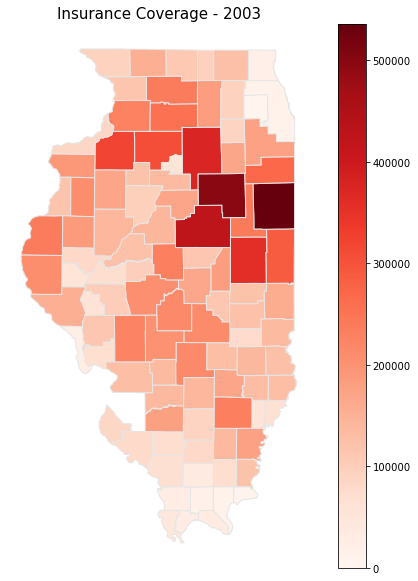

In [75]:
#plotting data for 2003

fig, ax = plt.subplots(1, figsize=(10,10))
merge03.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2003", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2004')

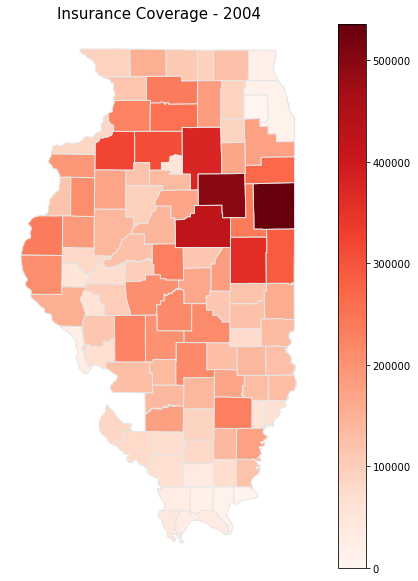

In [76]:
#plotting data for 2004

fig, ax = plt.subplots(1, figsize=(10,10))
merge04.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2004", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2005')

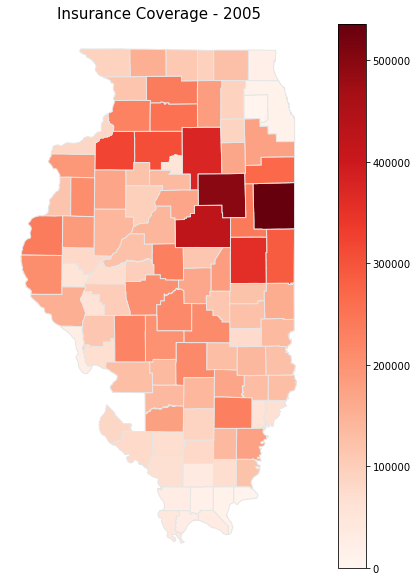

In [77]:
#plotting data for 2005

fig, ax = plt.subplots(1, figsize=(10,10))
merge05.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2005", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2006')

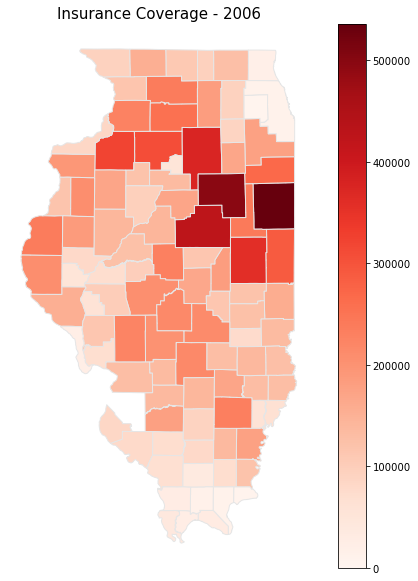

In [78]:
#plotting data for 2006

fig, ax = plt.subplots(1, figsize=(10,10))
merge06.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2006", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2007')

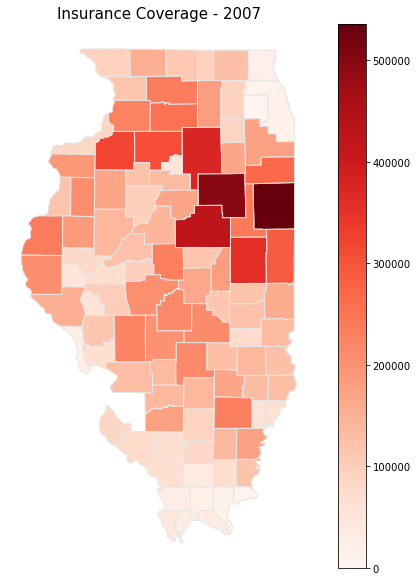

In [79]:
#plotting data for 2007

fig, ax = plt.subplots(1, figsize=(10,10))
merge07.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2007", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2008')

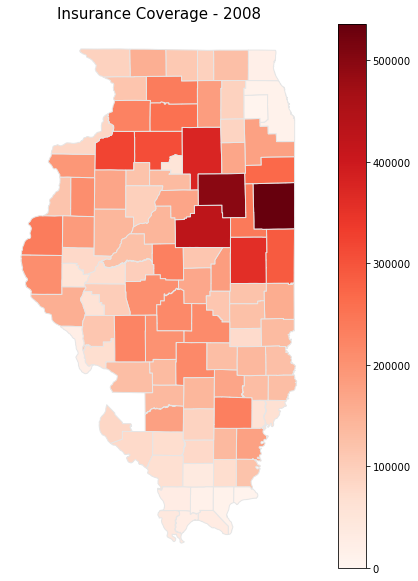

In [80]:
#plotting data for 2008

fig, ax = plt.subplots(1, figsize=(10,10))
merge08.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2008", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2009')

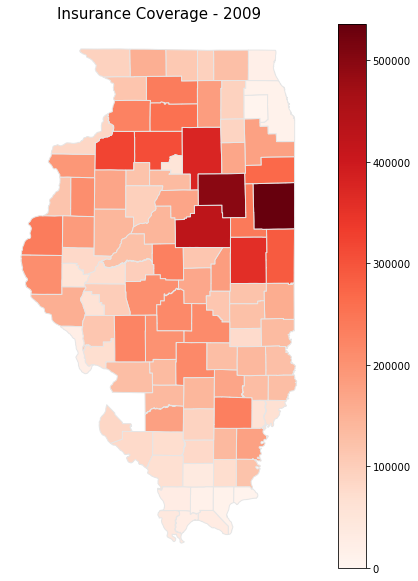

In [81]:
#plotting data for 2009

fig, ax = plt.subplots(1, figsize=(10,10))
merge09.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2009", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2010')

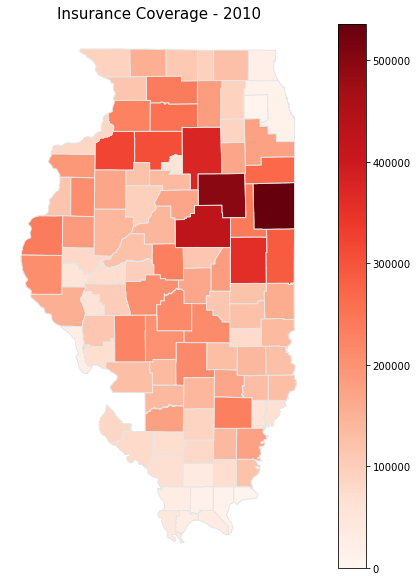

In [82]:
#plotting data for 2010

fig, ax = plt.subplots(1, figsize=(10,10))
merge10.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2010", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2011')

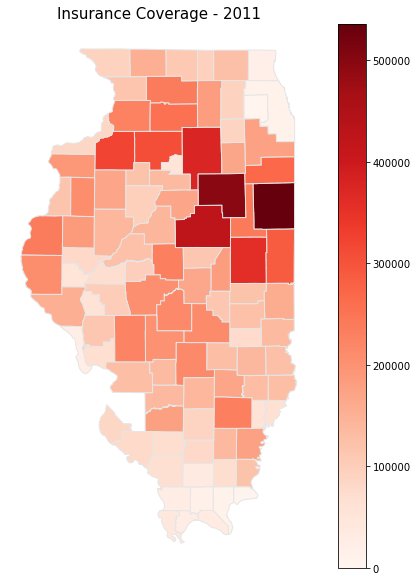

In [83]:
#plotting data for 2011

fig, ax = plt.subplots(1, figsize=(10,10))
merge11.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2011", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2012')

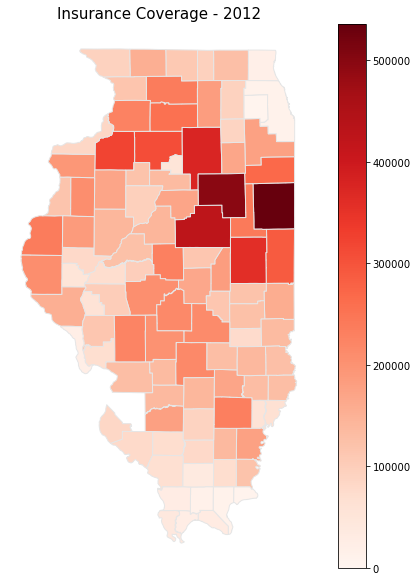

In [84]:
#plotting data for 2012

fig, ax = plt.subplots(1, figsize=(10,10))
merge12.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2012", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2013')

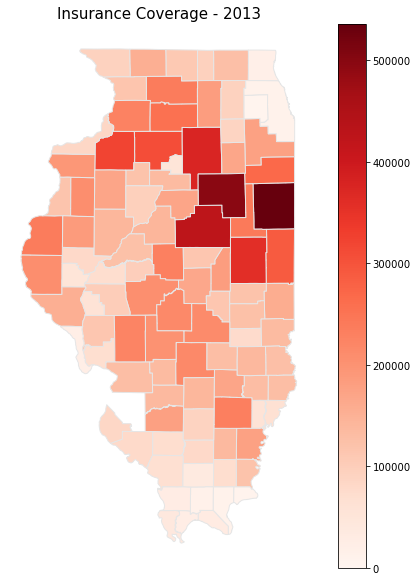

In [85]:
#plotting data for 2013

fig, ax = plt.subplots(1, figsize=(10,10))
merge13.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2013", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2014')

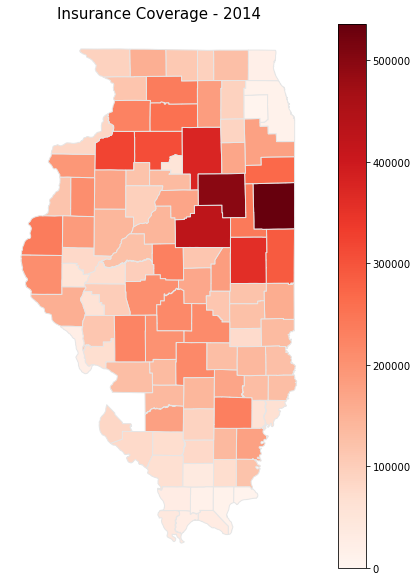

In [86]:
#plotting data for 2014

fig, ax = plt.subplots(1, figsize=(10,10))
merge14.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2014", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2015')

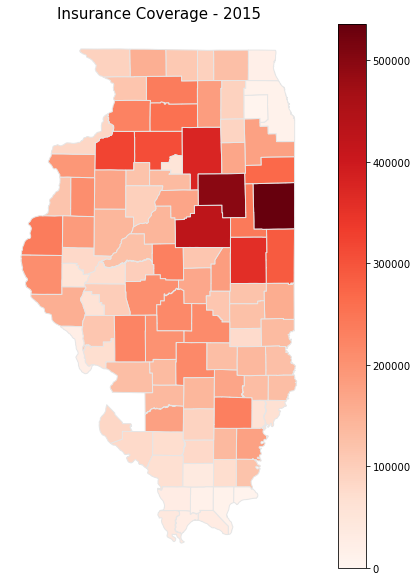

In [87]:
#plotting data for 2015

fig, ax = plt.subplots(1, figsize=(10,10))
merge15.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2015", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2016')

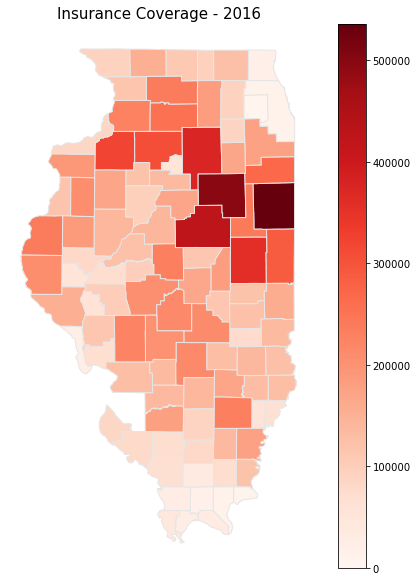

In [88]:
#plotting data for 2016

fig, ax = plt.subplots(1, figsize=(10,10))
merge16.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2016", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2017')

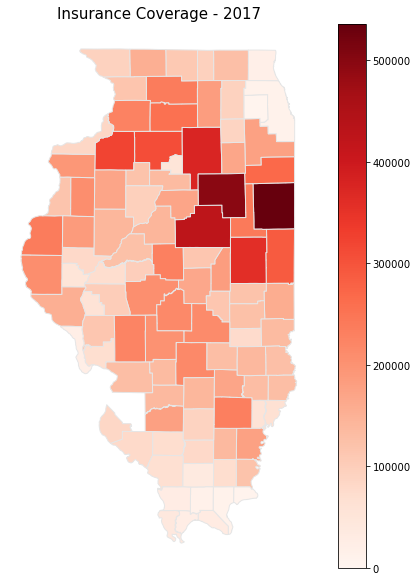

In [89]:
#plotting data for 2017

fig, ax = plt.subplots(1, figsize=(10,10))
merge17.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2017", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2017')

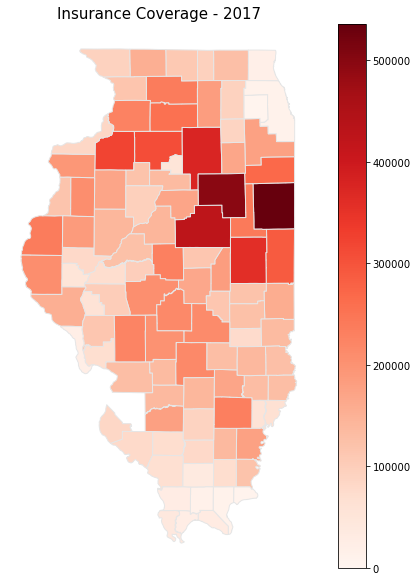

In [90]:
#plotting data for 2018

fig, ax = plt.subplots(1, figsize=(10,10))
merge18.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2017", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2019')

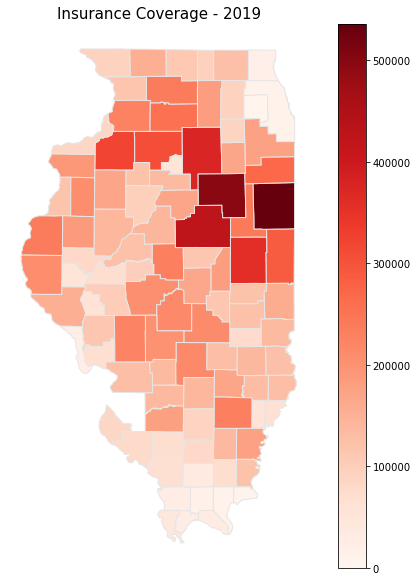

In [91]:
#plotting data for 2019

fig, ax = plt.subplots(1, figsize=(10,10))
merge19.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2019", fontsize=15)

Text(0.5, 1.0, 'Insurance Coverage - 2020')

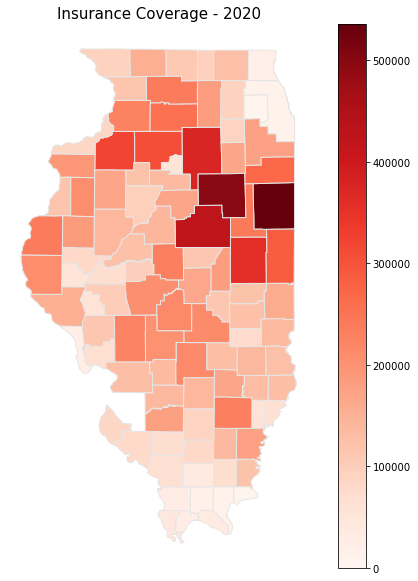

In [92]:
#plotting data for 2020

fig, ax = plt.subplots(1, figsize=(10,10))
merge20.plot(column='Net Reported Quantity', cmap='Reds', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
plt.title("Insurance Coverage - 2020", fontsize=15)